### Emergency call centres analysis 

This analysis is focused on analysing the data collected from emergency call centres in the USA, more specifically from EMS (Montgomery County, Philadelphia).

The data set is obtained from [Kaggle](https://www.kaggle.com/datasets/mchirico/montcoalert).

### Dataset explanation:

It contains 9 columns, as follows:  

* lat(Latitude) : String variable, Latitude
* lng(Longitude): String variable, Longitude
* desc(Description of Emergency): String variable, Description of the Emergency Call
* zip(zipcode): String variable, Zipcode
* title(Title of Emergency): String variable, Title
* timeStamp(Date and time of the call): String variable, YYYY-MM-DD HH:MM:SS
* twp(Towns): String variable, Township
* addr(General Address): String variable, Address
* e(Index column, always 1): String variable, Dummy variable (always 1)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline
import folium as fo
# from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv('911.csv')

### Exploring the data to check for any null values. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


###  What are the top 5 zipcodes for emergency calls?

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

###  What are the top 5 town (twp) for emergency calls? 

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Adding a column to categorise the reason of each call.

In [7]:
# Grabbing from title to a new column 'Reason' 
#to categorical column of three categories 

#Based on the title column, adding the first item in the list [0]
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [8]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Checking the data after adding the colum**

In [9]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### What are the most common reasons for the calls based off of this new column?



In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [11]:
fire_df = df[df['Reason'] == 'Fire']


In [12]:
traffic_df = df[df['Reason'] == 'Traffic']


In [13]:
t_and_fire_df = pd.concat([fire_df, traffic_df])

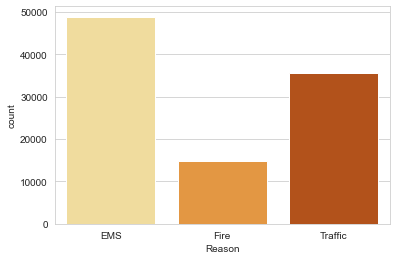

In [14]:
sns.countplot(x='Reason',data=df,palette='YlOrBr');

In [15]:
# sns.countplot(x='Reason', data=t_and_fire_df,palette='YlOrBr');

In [16]:
# type(df['timeStamp'].iloc[0])

**Converting the date string datatype to Date and time type**

In [17]:
# reseting the column to timestamp object using panda

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [18]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [19]:
time.year

2015

In [20]:
time.dayofweek

3

In [21]:
# Lambda function to take the time and return hour, month and day of week attributes

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [22]:
# Checking the dataframe after adding the hour, day and month 
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [23]:
# Changing the categorical day of week to string using dict

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

# using the map function to mao it to the dataframe 
df['Day of Week'] = df['Day of Week'].map(dmap)

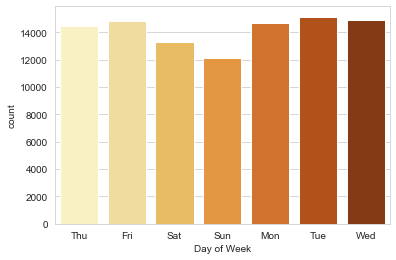

In [24]:
sns.countplot(x='Day of Week',data=df,palette='YlOrBr');

# # To relocate the legend
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

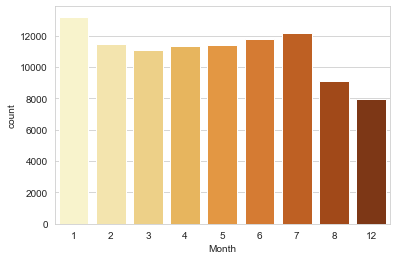

In [25]:
sns.countplot(x='Month',data=df,palette='YlOrBr');

### What time is busiest during the day?

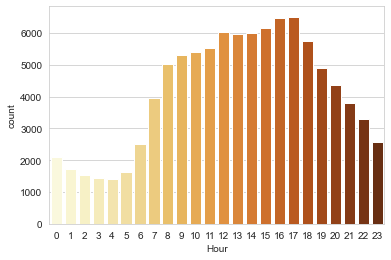

In [26]:
sns.countplot(x='Hour',data=df,palette='YlOrBr');

### What is the reason for call per category per week ?

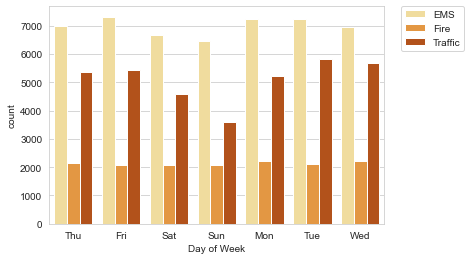

In [27]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='YlOrBr')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### What is the reason for call per category per month? 

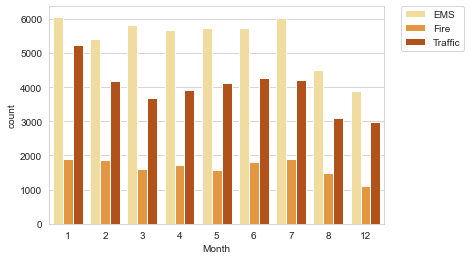

In [28]:
sns.countplot(x='Month',data=df,hue='Reason',palette='YlOrBr')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [29]:
#As showing above we have some missing months in the bar chart
# Aggregating the count by the latitude value 
#by assuming that we received a call if we have the location for it

byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


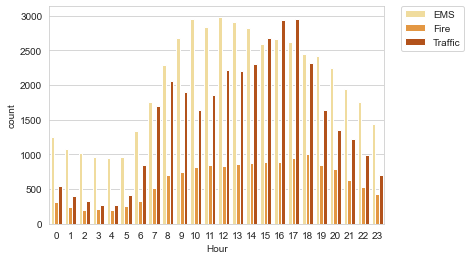

In [30]:
sns.countplot(x='Hour',data=df,hue='Reason',palette='YlOrBr')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

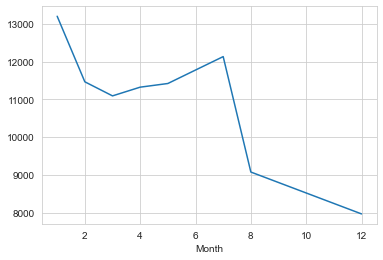

In [31]:
# Line plot cover all the 12 month for more insight 

byMonth['twp'].plot();

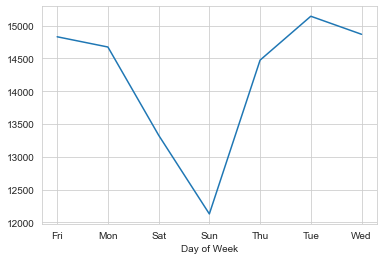

In [32]:

by_week = df.groupby('Day of Week').count()
by_week.head()
by_week['twp'].plot();

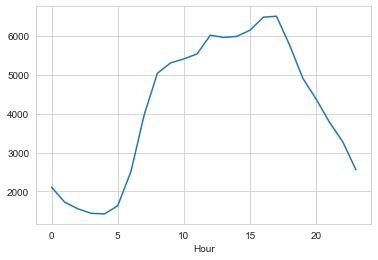

In [33]:
by_hour = df.groupby('Hour').count()
by_hour.head()
by_hour['twp'].plot();

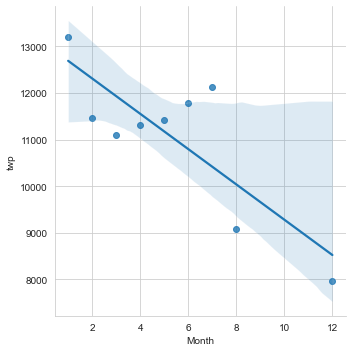

In [34]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index());

In [35]:
by_month = byMonth.loc[:, 'lat']

by_month_df = pd.DataFrame(by_month)


In [66]:
# sns.lineplot(data=may_flights, x="year", y="passengers")

# by_month_df

In [67]:


# EMS=df[df['title']=='EMS']
EMS = df.loc[:, 'twp']



In [68]:
EMS = pd.DataFrame(EMS)
EMS

,twp
0,NEW HANOVER
1,HATFIELD TOWNSHIP
2,NORRISTOWN
3,NORRISTOWN
4,LOWER POTTSGROVE
...,...
99487,NORRISTOWN
99488,LOWER MERION
99489,NORRISTOWN
99490,HORSHAM


In [69]:
#Top 25 towns with more calls
top_25=EMS['twp'].value_counts(ascending=False,normalize=True).head(25).index
top_25 = pd.DataFrame(top_25)


In [40]:
top_25 = top_25.set_axis(['twp'], axis=1, inplace=False)

### What are the towns with the most calls?

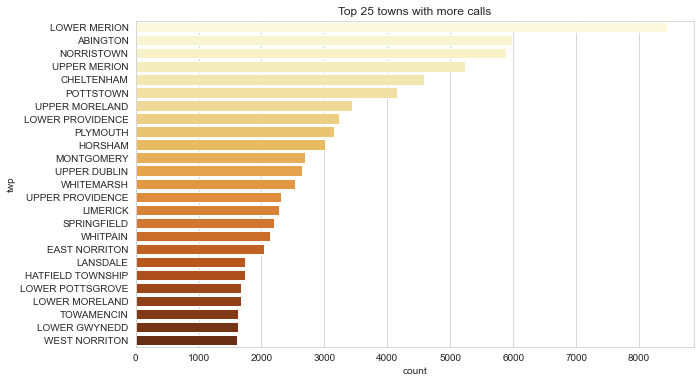

In [41]:
# Visualising top 25 towns with more calls
top_25=EMS['twp'].value_counts(ascending=False,normalize=True).head(25).index
plt.figure(figsize=(10,6))
sns.countplot(y='twp',data=EMS,order=top_25,  palette='YlOrBr')
plt.title('Top 25 towns with more calls');

In [42]:
t = df['timeStamp'].iloc[0]

In [43]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

# df['Date'] = df['Date'].dt.month_name().str[:3]

In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [45]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [46]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


We can observe a significant spikes from jan to feb and some bottom out spikes in may august 


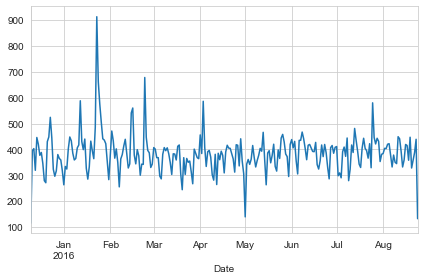

In [47]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

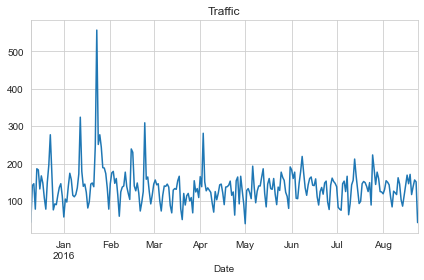

In [48]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

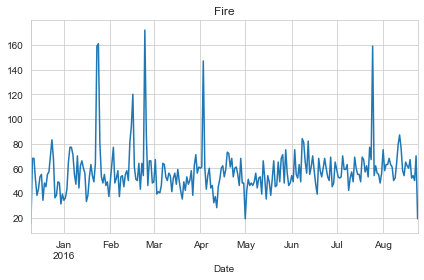

In [49]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

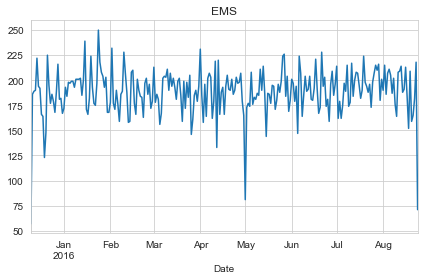

In [50]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()


In [51]:
df.groupby(by=['Day of Week', 'Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [52]:
day_hour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


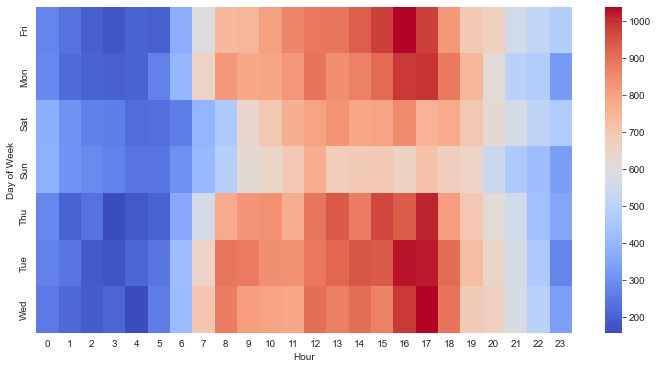

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour, cmap='coolwarm');

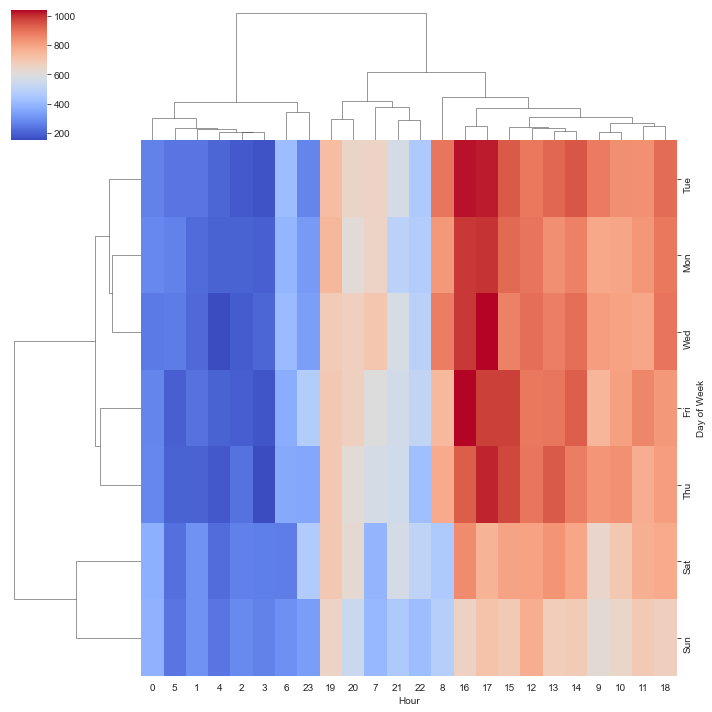

In [54]:
sns.clustermap(day_hour, cmap='coolwarm');

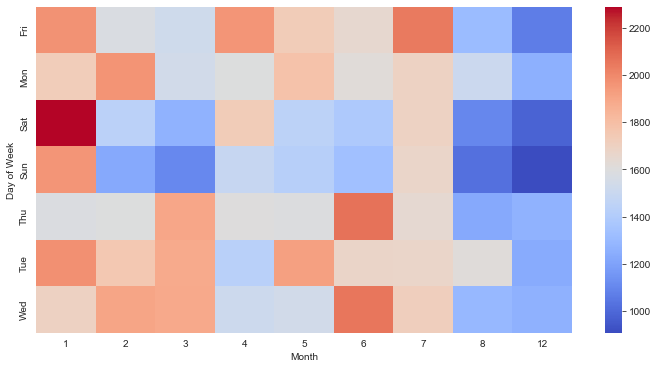

In [55]:
day_month = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
df.groupby(by=['Day of Week', 'Month']).count()
plt.figure(figsize=(12,6))
sns.heatmap(day_month, cmap='coolwarm');

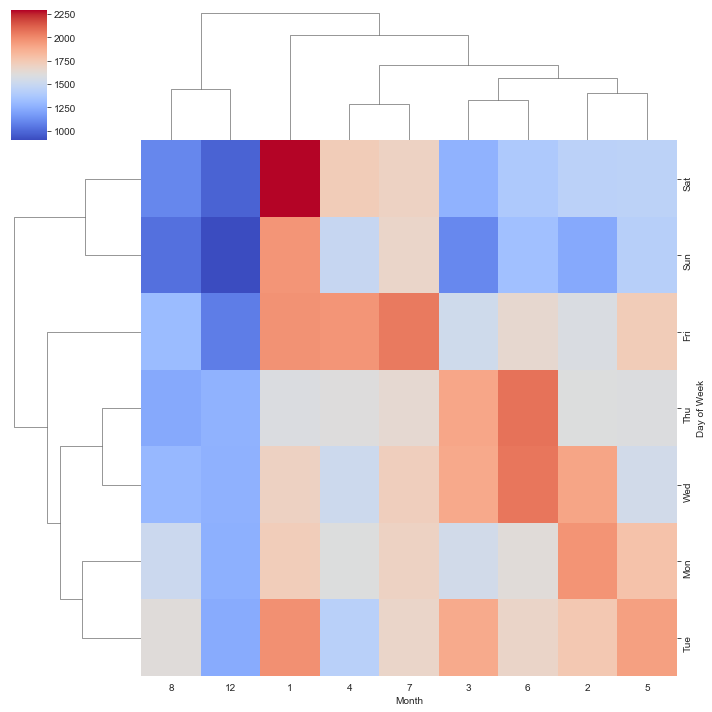

In [56]:
sns.clustermap(day_month, cmap='coolwarm');

In [57]:

monthmap={1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep",10:"Oct", 11:"Nov", 12:"Dec"}
df["Month"]=df["Month"].map(monthmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Dec,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Dec,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Dec,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Dec,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Dec,Thu,2015-12-10


In [58]:
months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

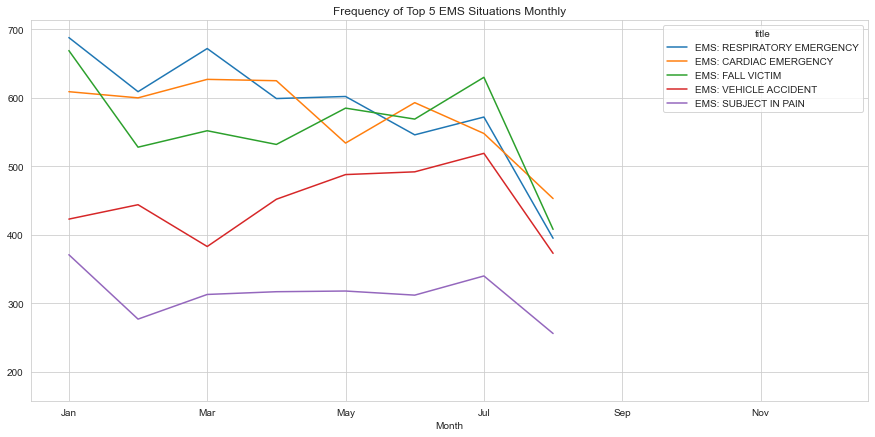

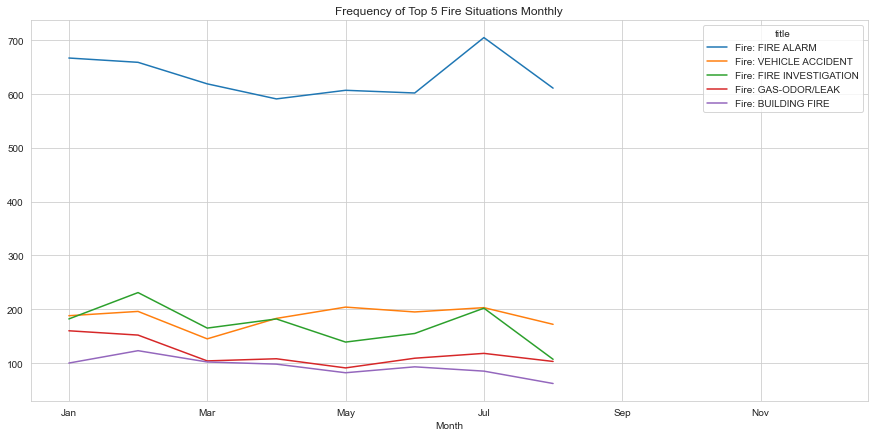

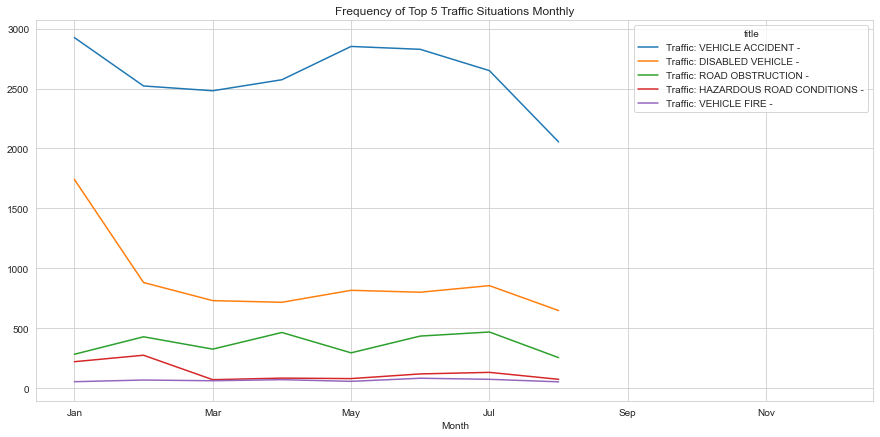

In [59]:
#count of each EMS calls month wise
EMS=df[df.Reason.isin(["EMS"])]
pvt3=pd.pivot_table(EMS,index="title",columns="Month",values="Day of Week",aggfunc=len,fill_value=0)
pvt3["Total"]=round(pvt3.sum(numeric_only=True, axis=1),2)
df3=pvt3.sort_values(by="Total", ascending=False).head(5)
eg=df3.drop("Total",axis=1).transpose().reindex(months)
eg.plot.line()



plt.gcf().set_size_inches(15,7)
plt.title('Frequency of Top 5 EMS Situations Monthly')#count of each Fire calls month wise
Fire=df[df.Reason.isin(["Fire"])]
pvt4=pd.pivot_table(Fire,index="title",columns="Month",values="Day of Week",aggfunc=len,fill_value=0)
pvt4["Total"]=round(pvt4.sum(numeric_only=True, axis=1),2)
df4=pvt4.sort_values(by="Total", ascending=False).head(5)
fg=df4.drop("Total",axis=1).transpose().reindex(months)
fg.plot.line()


plt.gcf().set_size_inches(15,7)
plt.title('Frequency of Top 5 Fire Situations Monthly')#count of each Traffic calls month wise
Traffic=df[df.Reason.isin(["Traffic"])]
pvt5=pd.pivot_table(Traffic,index="title",columns="Month",values="Day of Week",aggfunc=len,fill_value=0)
pvt5["Total"]=round(pvt5.sum(numeric_only=True, axis=1),2)
df5=pvt5.sort_values(by="Total", ascending=False).head(5)
tg=df5.drop("Total",axis=1).transpose().reindex(months)
tg.plot.line()
plt.gcf().set_size_inches(15,7)
plt.title('Frequency of Top 5 Traffic Situations Monthly');
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [60]:
import squarify

In [61]:
squ_reason = df.groupby('Reason').count()['Month']

In [62]:

colours = ["#E88846","#6e93d6","#caaa8d"]


**Treemap**

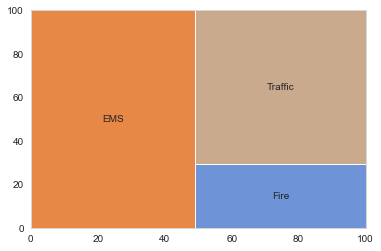

In [64]:
squarify.plot(squ_reason, label=squ_reason.index, color=colours);

In [65]:

Map=fo.Map([40.121354,-75.363829],zoom_start=7)
random_index=np.random.choice(df.index,1000)
for ind in random_index:
    lat=df.loc[ind,'lat']
    long=df.loc[ind,'lng']
    fo.CircleMarker([lat,long],radius=2).add_to(Map)
Map

